# Predicting heart disease using machine learning

This notebooks looks into using Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not a patient has heart disease?


## 2. Data

The original data came from Cleavland data from the UCI Machine Learning Repository.
* https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it available on Kaggle.
* https://www.kaggle.com/ronitf/heart-disease-uci


## 3. Evaluation

> If we can reach accuracy of 95% at predicting whether or not a patient har heart disease during the proof of concept, we'll pursue the project.


## 4. Features

This is where you'll get different information about each of the features in your data.

**Create a data dictionary**
* age in years
* sex (1=male, 0=female)
* cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
    - serum: LDL + HDL + .2*triglycerides
    - above 200 is cause for concern
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
    - 2: Possible or definite left ventricular hypertrophy
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1=yes, 0=no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
* ca: number of major vessels (0-3) colored by flourosopy
* thal: thallium stress result
    - 1,3 = normal;
    - 6 = fixed defect;
    - 7 = reversable defect
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# EDA and data manipulation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploratory data analysis

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# table of counts of target values
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

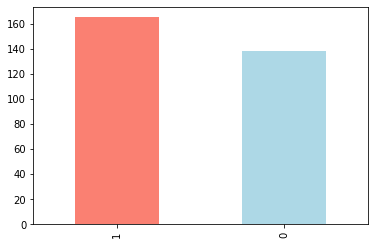

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values and all features are numeric!

### Heart Disease Frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


There's more than twice more men than women, and most of the women in this dataset have heart disease.

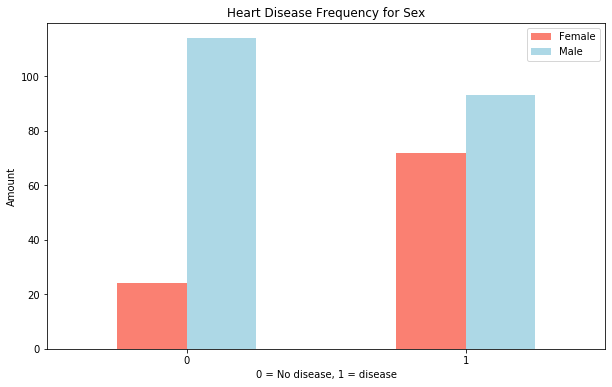

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # shows values in xaxis horizontally

### Heart Disease Frequency by Max Heart Rate and Age

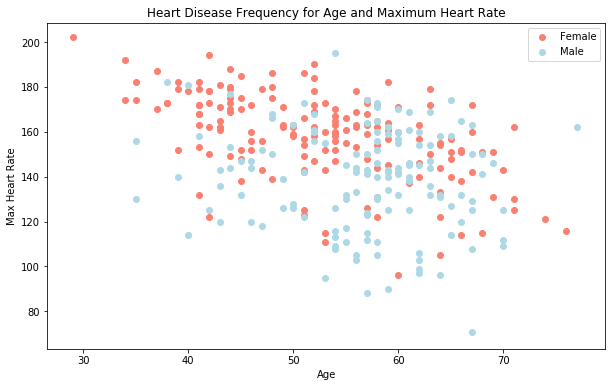

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart Disease Frequency for Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Female", "Male"]);

There seems to be a downward trend between age and maximum heart rate in patients with heart disease.

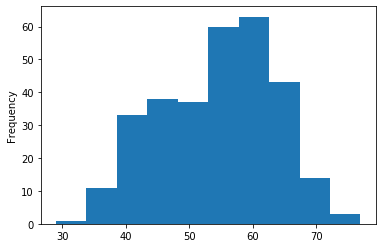

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

* cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


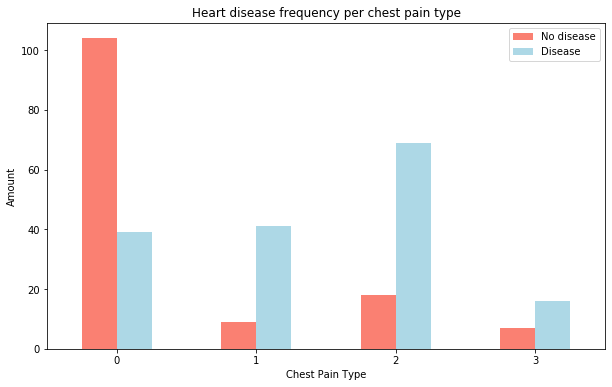

In [15]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

### Relation between all features

In [16]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


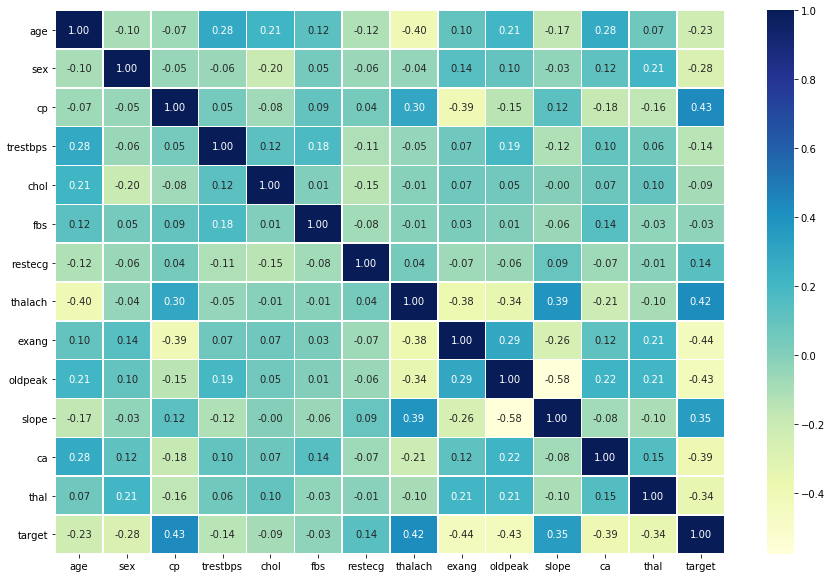

In [22]:
# Make the correlation matrix a bit more visual
# (using Seaborn's heatmap)

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True, # We want to annotate it
                 linewidths=0.5,
                 fmt=".2f", # 2 decimal places
                 cmap="YlGnBu"); # Yellow, Green, Blue

## 5. Modelling

We now use the exploratory data analysis to build a machine learning model.

In [26]:
# split data into features and target
X = df.drop("target", axis=1)
y = df["target"]

# split data into training/test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [28]:
len(y_train), len(y_test)

(242, 61)

Now let's build our model.
* We'll train it on the training set.
* We'll evaluate it on the test set.

We'll try 3 different machine learning models:
1. Logistic Regression,
2. K-Neighbours Classifier
3. and Random Forest Classifier.

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [35]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# We've already imported them at the beginning.

# Create a fn to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of Scikit-Learn machine learning models to fit
    X_train, y_train: training data
    X_test, y_test: test data
    """
    # set random seed
    np.random.seed(42)
    
    # make a dict to keep model scores
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        
        # fit model to the data
        model.fit(X_train, y_train)
        
        # evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [36]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/miguelcouto/Desktop/ML_udemy/heart_disease_project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Logistic Regression is performing the best here! But we've not obtained the accuracy of 95% we set out to get.

### Model Comparison

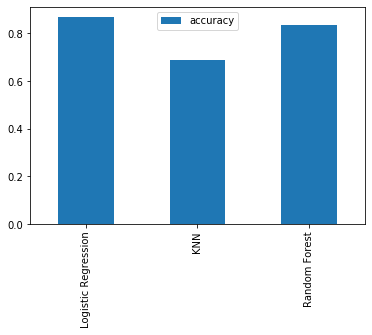

In [41]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
    # we transpose .T to make plot nicer

Now we've got a baseline model, and we know a model's first predictions aren't always what we should base our next steps off.

Let's look at the following hyperparameter tuning.


### Hyperparameter tuning on K-Neighbours Classifier

In [51]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbours = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # fit the model
    knn.fit(X_train, y_train)
    
    # update training and test scores list
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [52]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [53]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


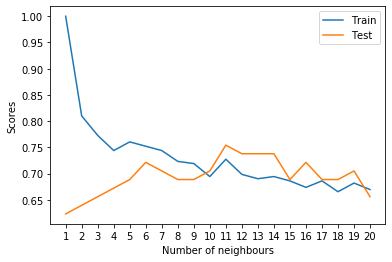

In [54]:
# Plotting train and test scores
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")

plt.xticks(np.arange(1, 21, 1)) # for printing all values from 1 to 20 on xaxis
plt.xlabel("Number of neighbours")
plt.ylabel("Scores")
plt.legend(["Train", "Test"]);

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Even with hyperparameter tuning, this model still doesn't give us as good an accuracy as the other two models, so we'll drop K-Neighbours Classifier.

### Hyperparameter tuning with RandomizedSearchCV

 Let's try tuning logistic regression and random forest with RandomizedSearchCV. Recall that this already performs cross-validation!
 
 We can check these models' parameters in:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

And we should also do some research (reading these pages, looking for more info online) to find which values to try.

In [60]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
    # logspace returns evenly spaced nrs in a log scale

# Tune LogisticRegression

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [62]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Tune RandomForestClassifier

np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_rf.fit(X_train, y_train)

rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [64]:
rs_log_reg.score(X_test, y_test), rs_rf.score(X_test, y_test)

(0.8852459016393442, 0.8688524590163934)

In [65]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Both of these are improvements on the accuracies of the original model scores, but we still don't have 95% accuracy.

So let's improve further on the model performing better, logistic regression!

###  Hyperparameter tuning with GridSearchCV

In [67]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

# Check the best hyperparameters
gs_log_reg.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


In [69]:
# evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

So, we obtained the same score as under RandomizedSearchCV. Then, we're gonna stick with this model.


## 6. Evaluating our model

* ROC curve
* Area under the ROC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

... and we'll use cross-validation where possible.

In [71]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

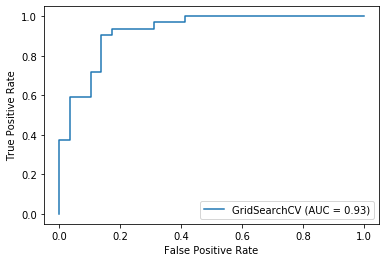

In [73]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [74]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


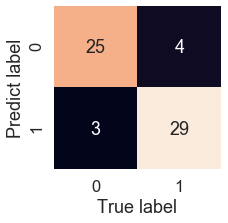

In [78]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predict label")

plot_conf_mat(y_test, y_preds)

So we obtained 4 false negatives and 3 false positives.

Let's now perform a classification report and cross-validated precision, recall and F1-score.

In [79]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Note that there is no class inbalance (we have 29 true negatives and 32 true positives).

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation.

In [80]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [92]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [93]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [94]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [95]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

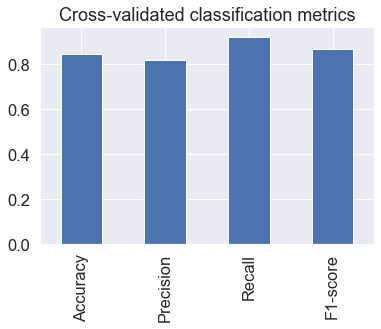

In [97]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1-score": cv_f1
}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature importance

> Which features contributes most to the outcomes of the model and how did they contribute?

This is done differently for each machine learning model. After researching, we perform feature importance for LogisticRegression as follows:

In [100]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train)

# check coef_
clf.coef_
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

This tells us how much and in what way each feature contributes for predicting the target variable. Let's visualize this:

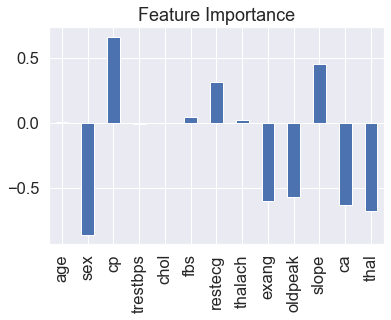

In [102]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False);

Compare this with the correlation matrix.

In [103]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


Sex has a negative influence in heart disease: the ratio of negative vs positive predictions is almost 1:3 for sex=0 and it is about 1:2 for sex=1, so as sex increases the ratio decreases, hence sex has a negative influence in the ratio.

In [104]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope has a positive influence in heart disease: the higher the slope (the change in heart rate when exercising), the more likely you are to have a heart disease.

Feature importance can be useful for reducing the number of features used in our model, potentially reducing its runtime and memory.


## 6. Experimentation for improving

Ways to improve:
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)


## 7. Saving/loading a model

If your model is good enough (you have hit your evaluation metric), export it and share it with others:

In [107]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, y_train)

import pickle

# Saving gs_clf classifier to file
pickle.dump(clf, open("tuned_log_reg_model_1.pkl", "wb"))
    # wb: write binary

# Loading a saved model
loaded_pickle_model = pickle.load(open("tuned_log_reg_model_1.pkl", "rb"))
    # rb: read binary